#Install libraries and import data to dataframe

In [ ]:
# installation
! pip install requests

In [ ]:
import pandas as pd
# requests for getting data file from Google Sheet link
import requests
# get latest Vietnam SARS-CoV-2 | COVID-19 data
import io
from io import BytesIO

# get data from shared Google Sheet
response = requests.get('https://docs.google.com/spreadsheets/u/1/d/1vkvCEkZ8txrTmEldQGAycVVQbBHV-BwqTaCrxNYTtug/export?format=csv&id=1vkvCEkZ8txrTmEldQGAycVVQbBHV-BwqTaCrxNYTtug&gid=453484829')
assert response.status_code == 200, 'Wrong status code'
data = response.content

# import data to dataframe
df = pd.read_csv(BytesIO(data), usecols=['Case', 'Current Location', 'Confirmed', 'Recovered']) #unprocessed data

# print few rows
df.head()

,Case,Current Location,Confirmed,Recovered
0,BN_01,"Ho Chi Minh City,Vietnam",1,1
1,BN_02,"Ho Chi Minh City,Vietnam",1,1
2,BN_03,"Thanh Hoa,Vietnam",1,1
3,BN_04,"Vinh Phuc,Vietnam",1,1
4,BN_05,"Vinh Phuc,Vietnam",1,1


In [ ]:
# create an unattached column with an index
dfCity = df[['Current Location']]
dfCity.columns = ['City']
print(dfCity)

                         City
0    Ho Chi Minh City,Vietnam
1    Ho Chi Minh City,Vietnam
2           Thanh Hoa,Vietnam
3           Vinh Phuc,Vietnam
4           Vinh Phuc,Vietnam
..                        ...
323   Dong Anh,Ha Noi,Vietnam
324         Hai Duong,Vietnam
325  Ho Chi Minh City,Vietnam
326         Thai Binh,Vietnam
327         Hai Duong,Vietnam

[328 rows x 1 columns]


# Top 5 cities in Vietnam

In [ ]:
nrow,_ = dfCity.shape    
for i in range(nrow):
    addr = dfCity.iloc[i,0]
    if (str(addr) == 'nan'):
        print('index = ', i, ' addr = ', addr, ' -> no address')
    else:
        s = addr.split(',')    #delimiter = ','
        state = len(s) - 2  #get cities
        city = s.pop(state)
        dfCity.at[i,'City'] = city
print(dfCity.head(5))

               City
0  Ho Chi Minh City
1  Ho Chi Minh City
2         Thanh Hoa
3         Vinh Phuc
4         Vinh Phuc


In [ ]:
# attach dfState to df
dfiNew = pd.concat([df, dfCity], axis=1)
print(dfiNew.head(5))

    Case          Current Location  Confirmed  Recovered              City
0  BN_01  Ho Chi Minh City,Vietnam          1          1  Ho Chi Minh City
1  BN_02  Ho Chi Minh City,Vietnam          1          1  Ho Chi Minh City
2  BN_03         Thanh Hoa,Vietnam          1          1         Thanh Hoa
3  BN_04         Vinh Phuc,Vietnam          1          1         Vinh Phuc
4  BN_05         Vinh Phuc,Vietnam          1          1         Vinh Phuc


In [ ]:
dfTop = dfiNew['City'].value_counts().head(5)
print(dfTop)

Ha Noi              126
Ho Chi Minh City     59
Thai Binh            29
Bac Lieu             20
Vinh Phuc            17
Name: City, dtype: int64


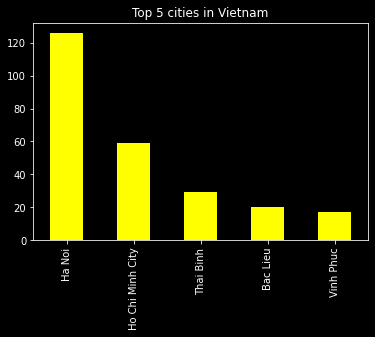

In [ ]:
import matplotlib.pyplot as plt
plt.style.use("dark_background")
dfTop.plot(kind='bar', color ='yellow', title='Top 5 cities in Vietnam')

#Top districts in Ha Noi

In [ ]:
dfiHN = dfiNew[dfiNew['City'] == 'Ha Noi']
print(dfiHN)

       Case          Current Location  Confirmed  Recovered    City
16    BN_17   Dong Anh,Ha Noi,Vietnam          1          1  Ha Noi
18    BN_19   Dong Anh,Ha Noi,Vietnam          1          1  Ha Noi
19    BN_20   Dong Anh,Ha Noi,Vietnam          1          1  Ha Noi
20    BN_21   Dong Anh,Ha Noi,Vietnam          1          1  Ha Noi
23    BN_24   Dong Anh,Ha Noi,Vietnam          1          1  Ha Noi
..      ...                       ...        ...        ...     ...
266  BN_267   Dong Anh,Ha Noi,Vietnam          1          1  Ha Noi
268  BN_269  Nghia Tan,Ha Noi,Vietnam          1          1  Ha Noi
269  BN_270   Dong Anh,Ha Noi,Vietnam          1          1  Ha Noi
322  BN_323   Dong Anh,Ha Noi,Vietnam          1          0  Ha Noi
323  BN_324   Dong Anh,Ha Noi,Vietnam          1          1  Ha Noi

[126 rows x 5 columns]


In [ ]:
# create an unattached column with an index
dfProvin = dfiHN[['Current Location']]
dfProvin.columns = ['Districts']
print(dfProvin.head(5))

                  Districts
16  Dong Anh,Ha Noi,Vietnam
18  Dong Anh,Ha Noi,Vietnam
19  Dong Anh,Ha Noi,Vietnam
20  Dong Anh,Ha Noi,Vietnam
23  Dong Anh,Ha Noi,Vietnam


In [ ]:
Districts=dfProvin['Districts'].values
dfDistricts = pd.DataFrame()
dfDistricts['Districts'] = Districts
print(dfDistricts)

                    Districts
0     Dong Anh,Ha Noi,Vietnam
1     Dong Anh,Ha Noi,Vietnam
2     Dong Anh,Ha Noi,Vietnam
3     Dong Anh,Ha Noi,Vietnam
4     Dong Anh,Ha Noi,Vietnam
..                        ...
121   Dong Anh,Ha Noi,Vietnam
122  Nghia Tan,Ha Noi,Vietnam
123   Dong Anh,Ha Noi,Vietnam
124   Dong Anh,Ha Noi,Vietnam
125   Dong Anh,Ha Noi,Vietnam

[126 rows x 1 columns]


In [ ]:
row,_ = dfDistricts.shape
for j in range(row):
    add = dfDistricts.iloc[j,0]
    p = add.split(',')    #delimiter = ','
    Districts = p.pop(0)
    dfDistricts.at[j,'Districts'] = Districts
print(dfDistricts.head(5))

  Districts
0  Dong Anh
1  Dong Anh
2  Dong Anh
3  Dong Anh
4  Dong Anh


In [ ]:
dfTopP = dfDistricts['Districts'].value_counts()
print(dfTopP)

Dong Anh        51
Dong Da         37
Thanh Xuan       7
Long Bien        6
Me Linh          5
Nghia Tan        5
Hoang Mai        3
Cau Giay         3
Hoan Kiem        3
Tay Ho           2
Ha Dong          1
Hoai Duc         1
Thach That       1
Hai Ba Trung     1
Name: Districts, dtype: int64


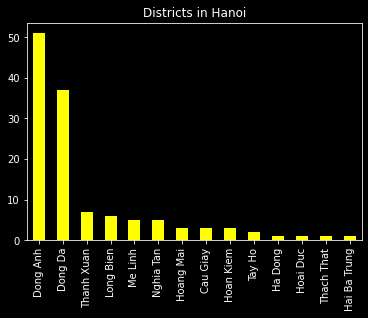

In [ ]:
dfTopP.plot(kind='bar',color ='yellow', title='Districts in Hanoi')